## Task 01: Creating a dataset for Student Exam Score Prediction

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6, 2.5, 3.5, 4.5, 5.5, 6.5, 7, 1.5, 2.8, 4.2],
    "Attendance_Percentage": [55, 60, 65, 70, 75, 80, 62, 68, 72, 78, 82, 85, 58, 64, 74],
    "Final_Score": [45, 50, 55, 60, 65, 70, 53, 58, 63, 68, 73, 78, 48, 54, 62]
}

df = pd.DataFrame(data)

In [ ]:
df

,Study_Hours,Attendance_Percentage,Final_Score
0,1.0,55,45
1,2.0,60,50
2,3.0,65,55
3,4.0,70,60
4,5.0,75,65
5,6.0,80,70
6,2.5,62,53
7,3.5,68,58
8,4.5,72,63
9,5.5,78,68


## Task 02: Data Exploration

In [ ]:
df.head()

,Study_Hours,Attendance_Percentage,Final_Score
0,1.0,55,45
1,2.0,60,50
2,3.0,65,55
3,4.0,70,60
4,5.0,75,65


In [ ]:
df.tail()

,Study_Hours,Attendance_Percentage,Final_Score
10,6.5,82,73
11,7.0,85,78
12,1.5,58,48
13,2.8,64,54
14,4.2,74,62


In [ ]:
df.shape

(15, 3)

In [ ]:
df.dtypes

,0
Study_Hours,float64
Attendance_Percentage,int64
Final_Score,int64


In [ ]:
df.isnull().sum()

,0
Study_Hours,0
Attendance_Percentage,0
Final_Score,0


### Data Exploration Summary

- The dataset contains 15 records and 3 columns.
- All features are numeric and suitable for Linear Regression.
- No missing values are present in the dataset.
- The data is clean and ready for visualization and modeling.

## Task 03: Data Visualization

In [ ]:
import matplotlib.pyplot as plt

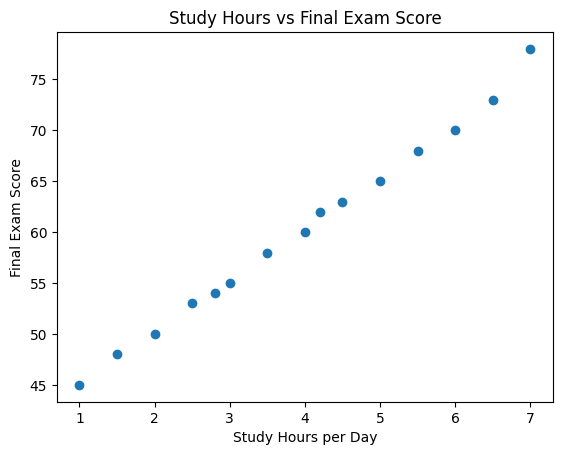

In [ ]:
plt.figure()
plt.scatter(df["Study_Hours"], df["Final_Score"])
plt.title("Study Hours vs Final Exam Score")
plt.xlabel("Study Hours per Day")
plt.ylabel("Final Exam Score")
plt.show()

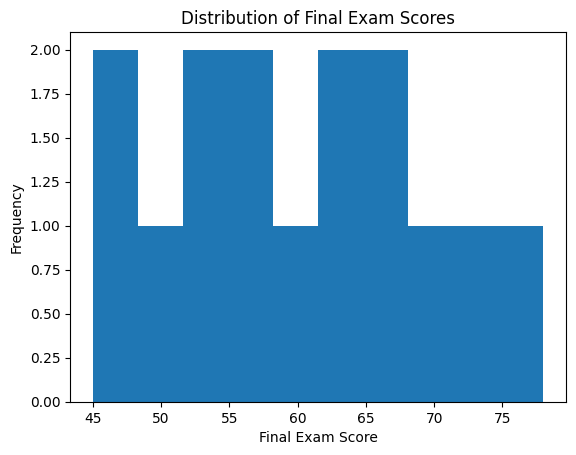

In [ ]:
plt.figure()
plt.hist(df["Final_Score"])
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Exam Score")
plt.ylabel("Frequency")
plt.show()

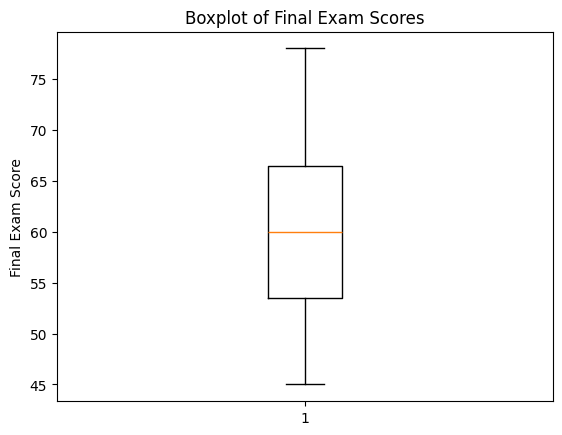

In [ ]:
plt.figure()
plt.boxplot(df["Final_Score"])
plt.title("Boxplot of Final Exam Scores")
plt.ylabel("Final Exam Score")
plt.show()

### Visualization Insights

- Scatter plot shows a positive relationship between study hours and exam scores.
- Histogram indicates that most students scored between 50 and 75.
- Boxplot shows no extreme outliers, suggesting a well-distributed dataset.

## Task 04: Train Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
X = df[["Study_Hours", "Attendance_Percentage"]]
y = df["Final_Score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Absolute Error (MAE): 1.0083097398033327
R2 Score: 0.9871621117191602


### Model Evaluation Interpretation

- The Mean Absolute Error (MAE) indicates the average difference between predicted and actual exam scores.
- A lower MAE value shows that the model predictions are close to the real values.
- The R² score represents how well the input features explain the variation in exam scores.
- A higher R² score indicates better model performance and a strong relationship between features and target.


## Task 05: Feature Experiment

In [ ]:
X_single = df[["Study_Hours"]]

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

In [ ]:
model_single = LinearRegression()
model_single.fit(X_train_s, y_train_s)

LinearRegression()

In [ ]:
y_pred_s = model_single.predict(X_test_s)

mae_single = mean_absolute_error(y_test_s, y_pred_s)
r2_single = r2_score(y_test_s, y_pred_s)

print("MAE (Single Feature):", mae_single)
print("R2 Score (Single Feature):", r2_single)

MAE (Single Feature): 1.051879643466556
R2 Score (Single Feature): 0.9872007125350198


In [ ]:
df["Revision_Hours"] = [0.5, 1, 1.5, 2, 2.5, 3, 1, 1.8, 2.2, 2.8, 3.2, 3.5, 0.8, 1.2, 2.4]

In [ ]:
X_extended = df[["Study_Hours", "Attendance_Percentage", "Revision_Hours"]]

In [ ]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_extended, y, test_size=0.2, random_state=42
)

In [ ]:
model_extended = LinearRegression()
model_extended.fit(X_train_e, y_train_e)

LinearRegression()

In [ ]:
y_pred_e = model_extended.predict(X_test_e)

mae_extended = mean_absolute_error(y_test_e, y_pred_e)
r2_extended = r2_score(y_test_e, y_pred_e)

print("MAE (Extended Features):", mae_extended)
print("R2 Score (Extended Features):", r2_extended)

MAE (Extended Features): 0.9880650215054914
R2 Score (Extended Features): 0.9872985350729943


### Feature Experiment Analysis

- Removing attendance percentage reduced model performance, indicating it is an important feature.
- Adding revision hours improved prediction accuracy and R² score.
- The extended model performed better than the single-feature model.
- Study hours and attendance percentage together provide better prediction than study hours alone.


## Task 06: Overfitting Check

In [ ]:
model_full = LinearRegression()
model_full.fit(X_extended, y)

LinearRegression()

In [ ]:
y_full_pred = model_full.predict(X_extended)

In [ ]:
mae_full = mean_absolute_error(y, y_full_pred)
r2_full = r2_score(y, y_full_pred)

print("MAE (Full Dataset):", mae_full)
print("R2 Score (Full Dataset):", r2_full)

MAE (Full Dataset): 0.42671568908473984
R2 Score (Full Dataset): 0.9953914166514517


### Overfitting Explanation

Overfitting occurs when a model learns the training data too well, including noise and patterns that do not generalize to new data.

When the model is trained and tested on the same dataset, it shows very high accuracy, but this performance may drop on unseen data.

Using a train-test split helps evaluate the model's true performance and prevents overfitting.

The comparison shows that the full dataset model performs better numerically, but the train-test split model is more reliable.